<center>
<img src="https://i.ibb.co/b3T5hkz/logo.png" alt="logo" border="0" width=600>


---
## 01. Another Image Classification Neural Network


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will train a simple neural network to classify galaxy images acording to their morphology. 

---

---

## The Galaxy10 SDSS Dataset

The Galaxy10 SDSS dataset contains 21785 colored images (g, r and i band) of galaxies with a size of 69x69 pixels separated in 10 classes:

- Class 0 (3461 images): Disk, Face-on, No Spiral
- Class 1 (6997 images): Smooth, Completely round
- Class 2 (6292 images): Smooth, in-between round
- Class 3 (394 images): Smooth, Cigar shaped
- Class 4 (1534 images): Disk, Edge-on, Rounded Bulge
- Class 5 (17 images): Disk, Edge-on, Boxy Bulge
- Class 6 (589 images): Disk, Edge-on, No Bulge
- Class 7 (1121 images): Disk, Face-on, Tight Spiral
- Class 8 (906 images): Disk, Face-on, Medium Spiral
- Class 9 (519 images): Disk, Face-on, Loose Spiral

These images come from the [Sloan Digital Sky Survey (SDSS)](http://www.sdss.org/) and the labels come from [Galaxy Zoo](https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/).

This dataset can be downloaded from [here](https://astronn.readthedocs.io/en/latest/galaxy10sdss.html) or directly from [here](http://astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5)

### Reading the dataset

The dataset is given in a .h5 file. Therefore, we will use the library `h5py`to read it,


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split

# Read and separate the images and labels from the file
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Neural Networks/06. Convolutional NN 02/Galaxy10SDSS.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])
  
# Define the classes names
galaxyClass = ['Disk, Face-on, No Spiral',
               'Smooth, Completely round',
               'Smooth, in-between round',
               'Smooth, Cigar shaped',
               'Disk, Edge-on, Rounded Bulge',
               'Disk, Edge-on, Boxy Bulge',
               'Disk, Edge-on, No Bulge',
               'Disk, Face-on, Tight Spiral',
               'Disk, Face-on, Medium Spiral',
               'Disk, Face-on, Loose Spiral']


In [6]:
labels

array([2, 2, 4, ..., 2, 9, 2], dtype=uint8)

The shapes of the images file and labels files are

In [7]:
print(images.shape)
print(labels.shape)

(21785, 69, 69, 3)
(21785,)


Lets visualize some of the images in composite color,

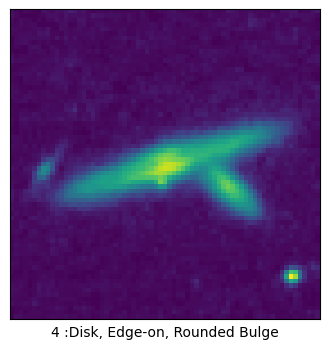

In [45]:
#i = int(np.random.rand(1)*21785)
i = 16211
plt.figure(figsize=(4,5))
plt.imshow(images[i,:,:,1])
plt.xticks([])
plt.yticks([])
plt.xlabel(f'{labels[i]:.0f} :'+ galaxyClass[labels[i]])
plt.show()

In [15]:
images[7898]

array([[[0.01568628, 0.01568628, 0.00784314],
        [0.01960784, 0.01960784, 0.01176471],
        [0.00784314, 0.00784314, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.        ],
        [0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0.00784314, 0.00392157]],

       [[0.01568628, 0.01568628, 0.00784314],
        [0.01568628, 0.01568628, 0.00784314],
        [0.00784314, 0.00784314, 0.        ],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.02352941, 0.02352941, 0.01960784],
        [0.01568628, 0.01568628, 0.01568628]],

       [[0.01176471, 0.01176471, 0.00392157],
        [0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        ...,
        [0.01568628, 0.01568628, 0.01568628],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941]],

       ...,

       [[0.00784314, 0.00784314, 0.00784314],
        [0.01568628, 0.01568628, 0.01176471],
        [0.01960784, 0

In order to classify the images, we will 'normalize' the images,


In [13]:
# Normalize the input data
images = images.astype(np.float32)/255

Now we will split the dataset into training and test subsets

In [16]:
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

In [17]:
train_labels.shape, test_labels.shape

((19606,), (2179,))

## The Classification Neural Network

We want to train a convolutional neural network model that reads the data and classify these images according to the morphology of the galaxt (targets). Therefore we need to declare the following:

- An input layer that reads the data in the image. This will be a 'Flatten' layer (it will take the image of size 69 by 69 with 3 channels and will convert it into a flat array with 69x69x3 = 14283 entries). Therefore, we need 14283 neurons in this layer.

- We will use two hidden dense layer with 50 neurons and a ReLU activation (ReLU will ignore negative values)

- Finally we will incorporate an output dense layer with 10 neurons (because the classes are given by a number from 0 to 9) and a 'softmax' activation function.

- The model will be a 'Sequential' neural network.

In [46]:
import tensorflow as tf


# input layer: Type Flatten. The input is an image of 69x69 pixels with 3 channels
inputlyr = tf.keras.layers.Flatten(input_shape=(69,69,3))

# hidden layers with 50 neurons and relu
hdnlyr01 = tf.keras.layers.Dense(units=50, activation=tf.nn.relu)
hdnlyr02 = tf.keras.layers.Dense(units=50, activation=tf.nn.relu)

# output layer
outlyr = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)


model = tf.keras.Sequential([inputlyr, hdnlyr01,  hdnlyr02, outlyr])

In order to compile the neural network we will include the [ADAM](https://keras.io/api/optimizers/adam/) optimizer, the [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) loss function and the [accuracy](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class) metric.

In [47]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [48]:
# print model summary before training
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14283)             0         
                                                                 
 dense (Dense)               (None, 50)                714200    
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 717,260
Trainable params: 717,260
Non-trainable params: 0
_________________________________________________________________


Now we will train the model using the train-sets and 5 epochs.

In [49]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
613/613 [==============================] - 10s 14ms/step - loss: 1.4327 - accuracy: 0.4424
Epoch 2/10
613/613 [==============================] - 10s 16ms/step - loss: 1.0476 - accuracy: 0.6227
Epoch 3/10
613/613 [==============================] - 10s 16ms/step - loss: 0.9361 - accuracy: 0.6600
Epoch 4/10
613/613 [==============================] - 8s 14ms/step - loss: 0.8814 - accuracy: 0.6783
Epoch 5/10
613/613 [==============================] - 10s 17ms/step - loss: 0.8420 - accuracy: 0.6917
Epoch 6/10
613/613 [==============================] - 10s 16ms/step - loss: 0.8163 - accuracy: 0.6992
Epoch 7/10
613/613 [==============================] - 9s 14ms/step - loss: 0.7962 - accuracy: 0.7061
Epoch 8/10
613/613 [==============================] - 12s 19ms/step - loss: 0.7761 - accuracy: 0.7147
Epoch 9/10
613/613 [==============================] - 10s 16ms/step - loss: 0.7588 - accuracy: 0.7201
Epoch 10/10
613/613 [==============================] - 11s 18ms/step - loss: 0.7324 

---
## Testing the Model

Now we will use the test subsets to probe the model. Using the '.evaluate()' method, we obtain the accuracy of the model (using the metric defined above),

In [50]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

69/69 - 1s - loss: 0.8741 - accuracy: 0.6801 - 704ms/epoch - 10ms/step

Test accuracy: 0.6801285147666931


Note that the trained model have an accuracy of just 0.665 on the test set.

Using the '.predict()' method we will obtain the predictions for the test set,

In [51]:
predictions = model.predict(test_images)

69/69 [==============================] - 0s 5ms/step


---
## Visualization of the Results

In order to visualize the result of the mode, we define two plotting functions. The first one shows the image together with the predicted value. The second one shows the probabilities of all the targets for the given sample.

In [52]:
def plot_image(i, p=predictions, tar = test_labels, image = test_images):
  target, img = tar[i], image[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap='gray')

  pred_target = np.argmax(p[i])
  if pred_target == target:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted: {} ({:2.0f}%)   True:{}".format(pred_target,
                                100*np.max(p),
                                target),
                                color=color)

def plot_value_array(i, p=predictions, tar = test_labels):
  target = tar[i]
  #plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), p[i], color="#777777")
  plt.ylim([0, 1])
  pred_target = np.argmax(p[i])

  thisplot[pred_target].set_color('red')
  thisplot[target].set_color('blue')

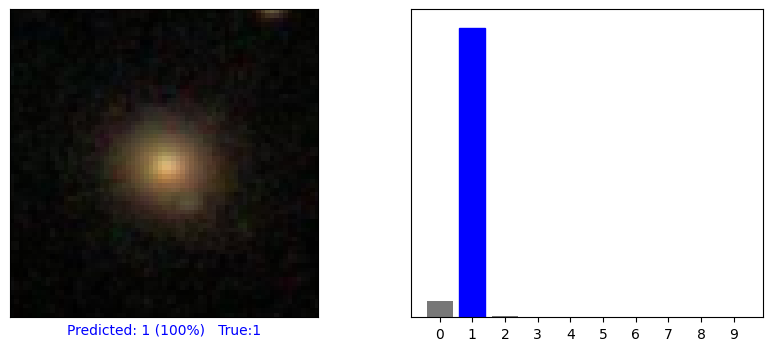

In [62]:
i = int(np.random.rand(1)*len(test_labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_image(i)
plt.subplot(1,2,2)
plot_value_array(i)
plt.show()